# Logistic Regression: Training Stability
Meichen Lu (meichenlu91@gmail.com) 17th April 2018

The solution to CS 229, Autumn 2017 Problem Set 2: Supervised Learning II, Question 1

- Training stability of logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (a-b) Different behaviours of two data sets

In [2]:
def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

In [3]:
def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

In [4]:
def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))
        
    return grad

In [7]:
def logistic_regression(X, Y):
    m, n = X.shape
#     theta = np.random.rand(n)
    theta = np.zeros(n)
    learning_rate = 10
    i = 0
    max_iter = 1000000
    theta_hist = np.zeros((max_iter+1,n))
    theta_hist[i,:] = theta
    # Define maximum iteration
    while i<max_iter:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        theta_hist[i,:] = theta
#         if i % 10000 == 0:
#             print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return theta_hist

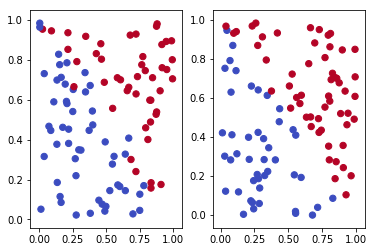

In [6]:
# Explore the two data set
Xa, Ya = load_data('cs229_Data/data_a.txt')
Xb, Yb = load_data('cs229_Data/data_b.txt')
plt.subplot(121)
plt.scatter(Xa[:,1], Xa[:,2], c=Ya, cmap=plt.cm.coolwarm, s=40)
plt.subplot(122)
plt.scatter(Xb[:,1], Xb[:,2], c=Yb, cmap=plt.cm.coolwarm, s=40)

In [8]:
print('==== Training model on data set A ====')
theta_hista = logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
theta_histb = logistic_regression(Xb, Yb)

==== Training model on data set A ====
Converged in 30364 iterations

==== Training model on data set B ====


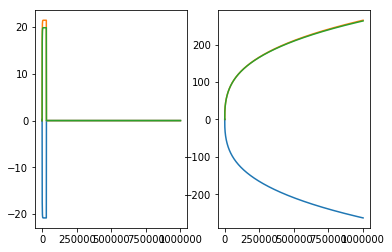

In [11]:
# The training does not converge for data set B, visualise the parameters
plt.subplot(121)
plt.plot(theta_hista)
plt.subplot(122)
plt.plot(theta_histb)

From the above plots, the parameters for the second data set continues to grow, but proportionately. Given the logistic regression $g(x) = \frac{1}{1+\exp(-\theta^T x)}$. The decision boundary of the logistic regression would not change if the coefficients increases proportionaly as $\theta^T x = 0$. Let us examine the decision boundary for data set B.

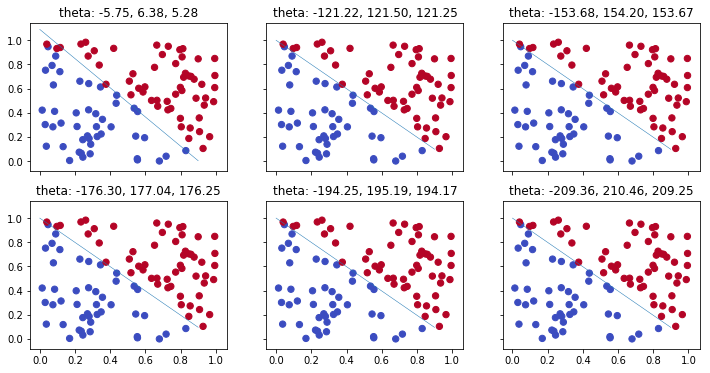

In [13]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 6))
axes = axes.ravel()

for i in range(6):
    theta = theta_histb[i*100000 + 20,:]
    ax = axes[i]
    xs = np.arange(0, 1, 0.1)
    ys = (-theta[0] - theta[1] * xs) / theta[2]
    ax.plot(xs, ys, lw=0.5)
    ax.scatter(Xb[:,1], Xb[:,2], c=Yb, cmap=plt.cm.coolwarm, s=40)
    title_str = 'theta: {:.2f}, {:.2f}, {:.2f}'.format(theta[0], theta[1], theta[2])
    ax.set_title(title_str)

Therefore, the deicision boundary is indeed the same and we can see that it perfectly separates the two classes. The reason for the parameters to keep increasing is to reduce the cost function. 

In [29]:
def cost_func(X, Y, theta_hist):
    cost = np.zeros(10000)
    for i in range(10000):
        theta = theta_hist[i,:]
        cost[i] = np.mean(np.log(1+ np.exp(-np.multiply(Yb, np.dot(Xb,theta))))) 
    return cost

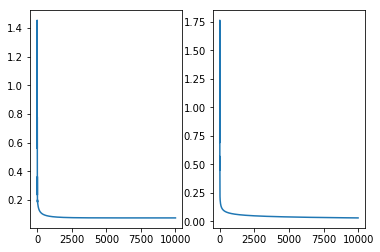

In [32]:
# Plot the cost function for the first 10,000 iterations
plt.subplot(121)
plt.plot(cost_func(Xa, Ya, theta_hista))
plt.subplot(122)
plt.plot(cost_func(Xb, Yb, theta_histb))

There is no such problem for data set A because the data was not linearly separable and there are miss-classified, so that increasing the parameters will increase the cost due to the miss-classified data. However, there is no such problem with data set B (It reminds one of the requirement for **normalisation in SVM**, otherwise the models with $w$ and $b$ changed proportionally gives the same decision boundary.)

## (c) Ways to fix the convergence problem
1. Using a different constant learning rate? No. 
2. Decreasing the learning rate over time (e.g. scaling the initial learning rate by $\frac{1}{t^2}$, where $t$ is the number of gradient descent iterations thus far)? 
No
3. Adding a regularization term $\Vert \theta \Vert^2$ to the loss function? Yes. The regularisation term will promotes small $\theta$ and results in convergence.
4. Linear scaling of the input features? No
5. Adding zero-mean Gaussian noise to the training data or labels? Maybe. If the data set were no longer linearly separable, it will converge.

## (d) Is SVM a solution?
Yes. The problem was considered when designing SVM. The model normalises the parameters such that the distance from the support vectors to the boundary are 1. 